In [1]:
import pandas as pd

# Extracting marriage postal survey participant data

In [2]:
df = pd.read_csv('Resources/participant-information.csv')
df.head()

,electoral_division,state,gender,age,age_lower,age_upper,eligible,participant
0,Canberra,Australian Capital Territory Divisions,female,18-19,18,19,"2,433","2,092"
1,Canberra,Australian Capital Territory Divisions,female,20-24,20,24,"6,171","5,084"
2,Canberra,Australian Capital Territory Divisions,female,25-29,25,29,"6,464","5,343"
3,Canberra,Australian Capital Territory Divisions,female,30-34,30,34,"6,359","5,260"
4,Canberra,Australian Capital Territory Divisions,female,35-39,35,39,"6,134","4,990"


# Extracting electorate division data

In [3]:
id_df = pd.read_csv('01-output_electoral_division/electoral_division.csv')
id_df.head()

,division_id,electoral_division,state
0,179,Adelaide,SA
1,197,Aston,VIC
2,198,Ballarat,VIC
3,103,Banks,NSW
4,180,Barker,SA


# Transforming the data to relevant turnout table

In [4]:
df.dtypes

electoral_division    object
state                 object
gender                object
age                   object
age_lower              int64
age_upper              int64
eligible              object
participant           object
dtype: object

In [5]:
# converting participant column to string then float 
df["participant"] = df["participant"].astype('str')
df["participant"] = df["participant"].str.replace(",","").astype(int)

In [6]:
# converting eligible column to string then float 
df["eligible"] = df["eligible"].astype('str')
df["eligible"] = df["eligible"].str.replace(",","").astype(int)

In [7]:
# to check conversion
df.dtypes

electoral_division    object
state                 object
gender                object
age                   object
age_lower              int64
age_upper              int64
eligible               int64
participant            int64
dtype: object

In [8]:
# groupby on electoral division and sum number of participants
participant_grouped = df.groupby(['electoral_division']).sum()['participant']

In [9]:
# groupby on electoral division and sum number of eligible
eligible_grouped = df.groupby(['electoral_division']).sum()['eligible']

In [10]:
# calculating turnout percentage for each electoral division
a = eligible_grouped
b = participant_grouped
turnout = (b/a)*100

In [11]:
# creating new database
grouped_df = pd.DataFrame({'total_eligible': eligible_grouped, 
                           'total_participants': participant_grouped, 
                           'turnout(%)': turnout})
grouped_df.head()

,total_eligible,total_participants,turnout(%)
electoral_division,,,
Adelaide,108708,88422,81.339000
Aston,95253,77706,81.578533
Ballarat,113368,92583,81.665902
Banks,104682,83846,80.095910
Barker,105297,81124,77.043031


In [12]:
grouped_df.dtypes

total_eligible          int64
total_participants      int64
turnout(%)            float64
dtype: object

In [13]:
# rounding turnout percentages to 1 decimal place
df = grouped_df.round({'turnout(%)': 1})

In [14]:
# merging with id_df dataframe
combined_df = pd.merge(df, id_df, how="inner", on="electoral_division")
combined_df.head()

,electoral_division,total_eligible,total_participants,turnout(%),division_id,state
0,Adelaide,108708,88422,81.3,179,SA
1,Aston,95253,77706,81.6,197,VIC
2,Ballarat,113368,92583,81.7,198,VIC
3,Banks,104682,83846,80.1,103,NSW
4,Barker,105297,81124,77.0,180,SA


In [15]:
# columns we want to keep, in the order we want to keepn them
columns = ['division_id', 'total_eligible', 'total_participants', 'turnout(%)']
combined_df = combined_df[columns]
combined_df.head()

,division_id,total_eligible,total_participants,turnout(%)
0,179,108708,88422,81.3
1,197,95253,77706,81.6
2,198,113368,92583,81.7
3,103,104682,83846,80.1
4,180,105297,81124,77.0


In [16]:
# are all the division id values unique?
combined_df['division_id'].is_unique

True

In [17]:
# setting the index as division_id
combined_df = combined_df.set_index("division_id")
combined_df.head()

,total_eligible,total_participants,turnout(%)
division_id,,,
179,108708,88422,81.3
197,95253,77706,81.6
198,113368,92583,81.7
103,104682,83846,80.1
180,105297,81124,77.0


# Exploratory Analysis

In [18]:
# summary statistics table
df.describe()

,total_eligible,total_participants,turnout(%)
count,150.000000,150.000000,150.000000
mean,105874.180000,84161.846667,79.376000
std,10729.867369,10222.195252,4.341321
min,67771.000000,34820.000000,50.100000
25%,101803.500000,79562.000000,77.225000
50%,105614.500000,85179.000000,79.950000
75%,111033.500000,89708.000000,82.175000
max,143881.000000,119740.000000,86.000000


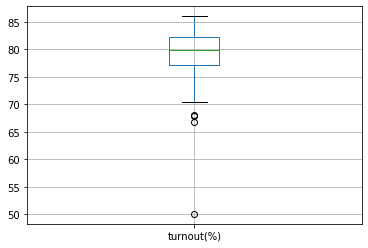

In [19]:
# box plot to investigate turnout data
df.boxplot(column=['turnout(%)'])

# Exporting DataFrame to CSV 

In [21]:
combined_df.to_csv("06-output_marriage_postal_turnout/marriage_postal_turnout.csv")